In [62]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from exod.utils.plotting import use_scienceplots
use_scienceplots()

In [5]:
evt = Table.read('0783080101_PN.fits')
evt['t0'] = evt['TIME'] - evt['TIME'].min()

In [40]:
xpos = 24473.458
ypos = 20137.664
size = 325.10496

t_start = 607342390
t_stop  = t_start+2000

xmax = xpos + size
xmin = xpos - size
ymax = ypos + size
ymin = ypos - size

sub = evt[(evt['X'] > xmin) & (evt['X'] < xmax) & (evt['Y'] > ymin) & (evt['Y'] < ymax)]
#sub = evt[(evt['RAWX'] > 21 - 3) & (evt['RAWX'] < 21+3) & (evt['RAWY'] > 181-3) & (evt['RAWY'] < 181+3) & evt['CCDNR'] == 1]
sub = sub[(sub['TIME'] > t_start) & (sub['TIME'] < t_stop)]
print(len(sub))

293


In [41]:
sub

TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,PAT_ID,PAT_SEQ,CCDNR,TIME_RAW,t0
s,pix,pix,0.05 arcsec,0.05 arcsec,0.05 arcsec,0.05 arcsec,channel,eV,,,,,,s,s
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,int16,uint8,uint8,float64,float64
607342604.6125475,23,160,-257,-4467,24677,20056,340,1837,0,3,5121,1,7,607342604.6101627,15669.255898475647
607342616.7230079,25,161,-90,-4379,24517,20156,117,621,0,0,0,0,7,607342616.7153643,15681.366358876228
607342674.1883615,26,164,-50,-4167,24492,20370,488,2507,0,0,0,0,7,607342674.1600723,15738.83171248436
607342685.1964989,28,162,130,-4278,24305,20272,1515,7696,0,1,5121,0,7,607342685.164807,15749.839849829674
607342685.8362372,28,158,92,-4663,24315,19886,240,1254,0,0,0,0,7,607342685.8251128,15750.479588150978
607342716.1247152,27,163,22,-4247,24415,20295,137,1232,0,11,5121,1,7,607342716.1248174,15780.768066167831
607342719.179398,25,161,-86,-4390,24512,20145,292,1512,0,0,0,0,7,607342719.2061175,15783.82274889946
607342724.6807426,26,163,-32,-4246,24469,20293,159,1421,0,4,5121,0,7,607342724.7084963,15789.324093580246


In [42]:
sub.to_pandas()['RAWY'].value_counts()

RAWY
161    104
160     76
162     48
159     25
163     17
164     11
158     10
157      1
165      1
Name: count, dtype: int64

In [43]:
sub.to_pandas()['RAWX'].value_counts()

RAWX
26    81
25    77
27    35
24    34
28    23
23    21
29    18
22     4
Name: count, dtype: int64

Text(0, 0.5, 'PI / 1000 (keV)')

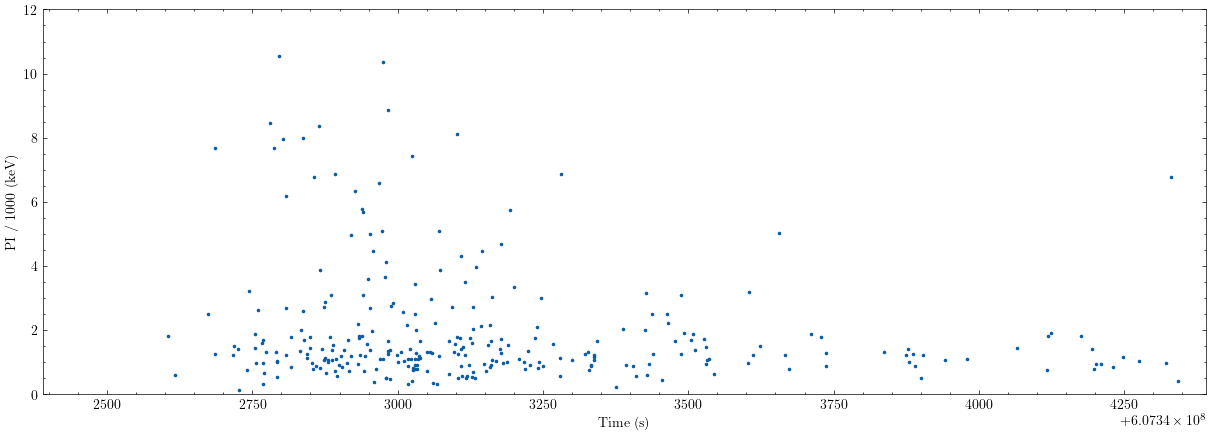

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(sub['TIME'], sub['PI']/1000, marker='.', s=10)

plt.xlim(t_start, t_stop)
plt.ylim(0,12)
plt.xlabel('Time (s)')
plt.ylabel('PI / 1000 (keV)')

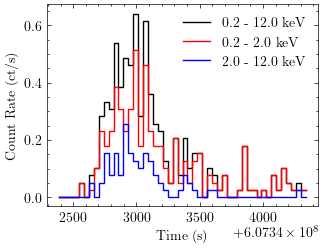

In [112]:
Energies = [[200, 12000],
            [200,2000],
            [2000,12000]]

colors = ['black', 'red', 'blue']

i=0
for E_lo, E_hi in Energies:
    sub2 = sub[(sub['PI'] > E_lo) & (sub['PI'] < E_hi)]
    x = np.arange(t_start, t_stop, 39)
    y = sub2['TIME']
    bins, edges = np.histogram(y, bins=x)
    bins = bins / 39
    plt.step(x[:-1], bins, label=f'{E_lo/1000} - {E_hi/1000} keV', color=colors[i])
    plt.ylabel('Count Rate (ct/s)')
    plt.xlabel('Time (s)')
    plt.legend()
    i+=1

Text(0, 0.5, 'PI / 1000 (keV)')

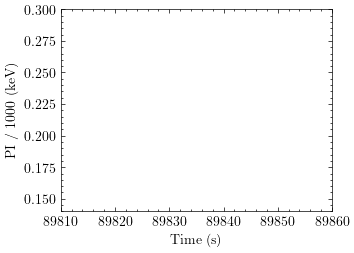

In [53]:
plt.figure()
plt.step(sub['t0'], sub['PI']/1000)
plt.xlim(89810,89860)
plt.ylim(0.14,0.3)
plt.xlabel('Time (s)')
plt.ylabel('PI / 1000 (keV)')


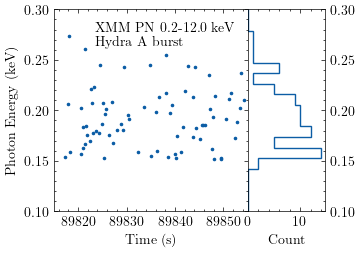

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with GridSpec to handle two panels
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.0)

ax0 = fig.add_subplot(gs[0])
ax0.scatter(sub['t0'], sub['PI'] / 1000, marker='.', s=10, label='XMM PN 0.2-12.0 keV\nHydra A burst')
ax0.set_xlim(89815, 89855)
ax0.set_ylim(0.1, 0.3)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Photon Energy (keV)')
leg = ax0.legend(loc='upper right')
leg.legend_handles[0].set_visible(False)

ax1 = fig.add_subplot(gs[1], sharey=ax0)
ax1.hist(sub['PI'] / 1000, bins=np.linspace(0.1, 0.3, 20), orientation='horizontal', histtype='step')
ax1.set_ylim(0.1, 0.3)
ax1.set_xlabel('Count')
ax1.yaxis.set_ticks_position("right")
plt.savefig('../../data/plots/hydra_A_spec_lc.png')
plt.savefig('../../data/plots/hydra_A_spec_lc.pdf')

plt.show()


In [121]:
print(sub)

       TIME       RAWX RAWY ... CCDNR      TIME_RAW             t0        
        s         pix  pix  ...               s                 s         
----------------- ---- ---- ... ----- ----------------- ------------------
704173298.3822162   21  182 ...     1 704173298.4574909                0.0
704173588.9237885   21  182 ...     1 704173588.8824484  290.5415723323822
704173996.8256985   21  180 ...     1 704173996.8318961  698.4434822797775
 704174339.721331   21  180 ...     1  704174339.644863 1041.3391147851944
 704174519.133322   21  182 ...     1  704174519.118729 1220.7511057853699
  704175063.82195   21  181 ...     1 704175063.9144958 1765.4397337436676
704175112.0772047   21  180 ...     1 704175112.1194637  1813.694988489151
704175250.8726841   21  182 ...     1 704175250.9577171 1952.4904679059982
704175602.3857412   21  180 ...     1 704175602.3360579  2304.003525018692
              ...  ...  ... ...   ...               ...                ...
704282602.1861234   21  1

Text(0, 0.5, 'PI / 1000 (keV)')

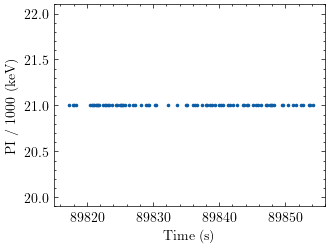

In [118]:
xpos = 22933.122
ypos = 26315.909
size = 100
xmax = xpos + size
xmin = xpos - size
ymax = ypos + size
ymin = ypos - size

sub = evt[(evt['X'] > xmin) & (evt['X'] < xmax) & (evt['Y'] > ymin) & (evt['Y'] < ymax)]
sub['t0'] = sub['TIME'] - min(sub['TIME'])
plt.figure()
plt.scatter(sub['t0'], sub['RAWX'], marker='.', s=10)
plt.xlim(89815,89856)
#plt.ylim(181,183)
plt.xlabel('Time (s)')
plt.ylabel('PI / 1000 (keV)')


In [119]:
89856 - 89815

41

491


Text(0, 0.5, 'PI / 1000 (keV)')

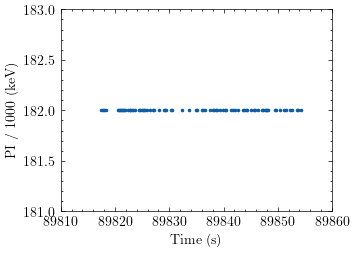

In [120]:
xpos = 22933.122
ypos = 26315.909
size = 100
xmax = xpos + size
xmin = xpos - size
ymax = ypos + size
ymin = ypos - size

sub = evt[(evt['X'] > xmin) & (evt['X'] < xmax) & (evt['Y'] > ymin) & (evt['Y'] < ymax)]
sub['t0'] = sub['TIME'] - min(sub['TIME'])
print(len(sub))
plt.figure()
plt.scatter(sub['t0'], sub['RAWY'], marker='.', s=10)
plt.xlim(89810,89860)
plt.ylim(181,183)
plt.xlabel('Time (s)')
plt.ylabel('PI / 1000 (keV)')


In [50]:
tab_lc = Table.read('0843890301_PN0_dt1.lc')
tab_lc['t0'] = tab_lc['TIME'] - min(tab_lc['TIME'])
tab_lc

TIME,RATE,ERROR,FRACEXP,BACKV,BACKE,t0
s,ct / s,ct / s,fraction,ct / s,ct / s,s
float64,float32,float32,float32,float32,float32,float64
704172823.232283,0.0,0.0,0.6467242,0.0,0.0,0.0
704172824.232283,0.0,0.0,0.7451414,0.0,0.0,1.0
704172825.232283,0.0,0.0,0.7451619,0.0,0.0,2.0
704172826.232283,0.0,0.0,0.7451209,0.0,0.0,3.0
704172827.232283,0.0,0.0,0.75514686,0.0,0.0,4.0
704172828.232283,0.0,0.0,0.7618035,0.0,0.0,5.0
704172829.232283,0.0,0.0,0.7617626,0.0,0.0,6.0
704172830.232283,0.0,0.0,0.7618035,0.0,0.0,7.0


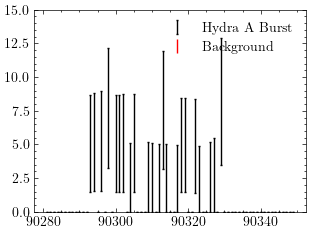

In [38]:
sub = tab_lc[(tab_lc['t0'] > 90280) & (tab_lc['t0'] < 90350)]
#plt.step(sub['t0'], sub['RATE'], color='black')
plt.errorbar(sub['t0'], sub['RATE'], yerr=sub['ERROR'], ls='none', color='black', capsize=1.0, label='Hydra A Burst')
plt.errorbar(sub['t0'], sub['BACKV'], yerr=sub['BACKE'], ls='none', color='red', label='Background')
plt.ylim(0,15)
#plt.xlim(90200,90400)
plt.legend()

In [33]:
evt = Table.read('pnfiltered.ds')
sub = evt[(evt['X'] > xmin) & (evt['X'] < xmax) & (evt['Y'] > ymin) & (evt['Y'] < ymax)]
sub['t0'] = sub['TIME'] - min(sub['TIME'])
sub = sub[(sub['t0'] > 89310) & (sub['t0'] < 92000)]
sub

TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,PAT_ID,PAT_SEQ,CCDNR,TIME_RAW,t0
s,pix,pix,0.05 arcsec,0.05 arcsec,0.05 arcsec,0.05 arcsec,channel,eV,,,,,,s,s
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,int16,uint8,uint8,float64,float64
704263116.2505789,21,182,-3983,437,22877,26415,37,206,0,0,0,0,1,704263116.3250495,89527.3267903328
704263116.4301655,21,182,-3918,454,22944,26410,50,274,0,0,0,0,1,704263116.5242225,89527.50637698174
704263118.9160355,21,182,-3994,448,22868,26402,37,202,0,0,0,0,1,704263118.914559,89529.99224698544
704263119.7135804,21,182,-3922,490,22947,26374,47,261,0,0,0,0,1,704263119.711325,89530.78979182243
704263121.134458,21,182,-3936,505,22936,26357,40,221,0,0,0,0,1,704263121.1057045,89532.21066939831
704263121.2332034,21,182,-3984,502,22888,26351,38,207,0,0,0,0,1,704263121.3048954,89532.30941486359
704263121.6657883,21,182,-3927,460,22936,26403,41,223,0,0,0,0,1,704263121.7032797,89532.74199974537
704263122.9499079,21,182,-3990,442,22871,26409,44,245,0,0,0,0,1,704263122.898448,89534.02611935139


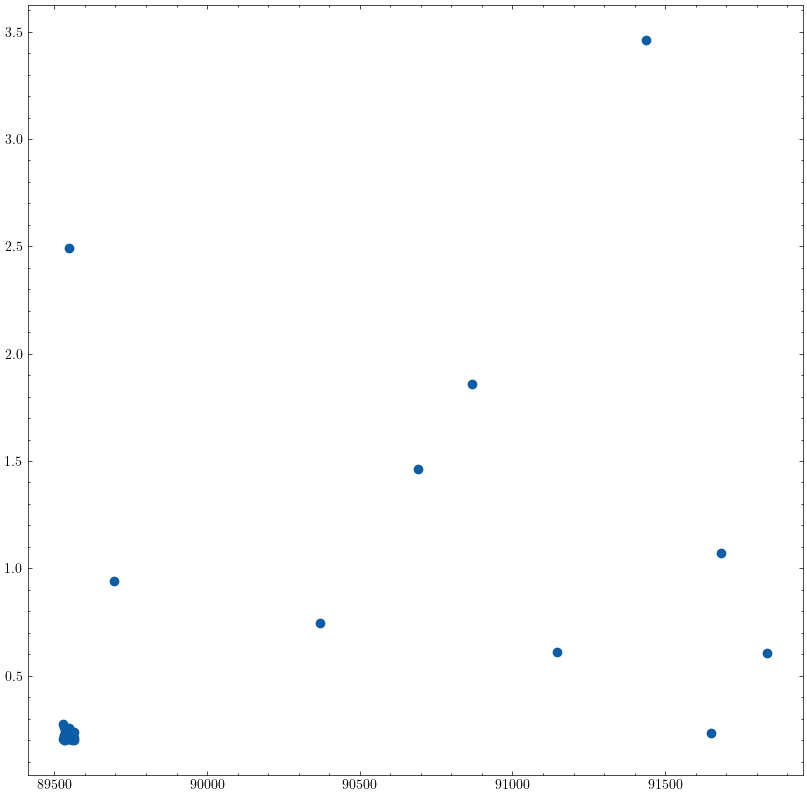

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(sub['t0'], sub['PI']/1000)